In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
raw_data = pd.read_csv('/content/sample_data/train.csv', header=None, skiprows=1, names=['ID','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','age','gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','result','age_desc','relation','Class/ASD'])

In [ ]:
CATEGORICAL_COLUMNS = ['gender','ethnicity','jaundice','austim','contry_of_res','used_app_before','age_desc','relation']

In [ ]:
features = CATEGORICAL_COLUMNS

In [ ]:
new_raw_data = pd.get_dummies(raw_data, columns = CATEGORICAL_COLUMNS)

In [ ]:
X = new_raw_data.drop('Class/ASD', axis=1).values
y = new_raw_data['Class/ASD'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train,y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.6125 0.575  0.7    0.625  0.7125 0.6    0.6375 0.5875 0.6875 0.6375]
Mean CV Score: 0.6375000000000001
Standard Deviation of CV Scores: 0.04541475531146238


In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.50      0.65       129
           1       0.29      0.84      0.43        31

    accuracy                           0.57       160
   macro avg       0.61      0.67      0.54       160
weighted avg       0.80      0.57      0.61       160



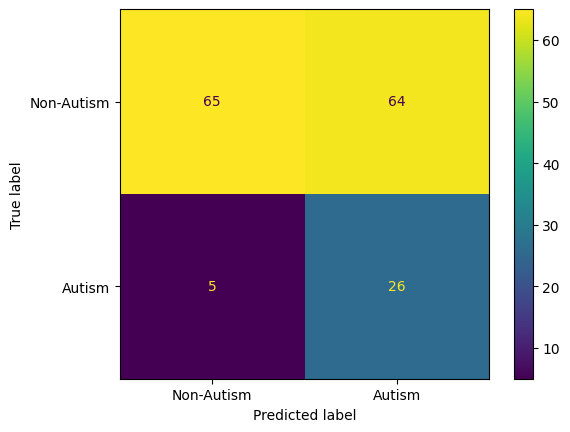

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Autism', 'Autism'])

cm_display.plot()
plt.show()